In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import DistanceMetric
from math import radians
import sklearn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("Data.csv", sep=';')

In [4]:
data.head()

,Id,City,Area,Street,HouseNumber,Price,Size,Rooms,Floor,NumberOfFloors,Year,Type,Heating,Furnishings,Link,UploadDate,ViewedBy,RememberedBy,ScrapeDate,Class
0,7267DDDD-FA74-4207-810D-00026484311F,Kaunas,Žaliakalnis,Žemaitės g.,8,109900,"53,43",3,3,3,1932,Mūrinis,Elektra,Įrengtas,https://www.aruodas.lt/butai-kaune-zaliakalnyj...,2022-01-05 00:00:00.0000000,3093,105,2022-02-17 07:23:49.5609860,butas
1,46238971-7411-4652-9C87-001F823983B4,Kaunas,Centras,Karaliaus Mindaugo pr.,9,208000,65,3,2,4,2021,Mūrinis,Centrinis kolektorinis,Dalinė apdaila,https://www.aruodas.lt/butai-kaune-centre-kara...,2021-09-17 00:00:00.0000000,2165,5,2022-02-17 08:02:13.4286030,butas
2,8F4668E0-DA77-433E-B808-00284BF38DBB,Kaunas,Žaliakalnis,Aukštaičių g.,72,62000,"62,9",3,2,2,1938,Rąstinis,Dujinis,Įrengtas,https://www.aruodas.lt/butai-kaune-zaliakalnyj...,2022-01-24 00:00:00.0000000,1989,28,2022-02-17 01:31:55.3578090,butas
3,50414B50-44B6-458C-A2A6-004FF4A1AC2B,Kaunas,Šilainiai,Naujakurių g.,94,99000,55,3,8,9,2021,Mūrinis,Centrinis kolektorinis,Dalinė apdaila,https://www.aruodas.lt/butai-kaune-silainiuose...,2022-02-07 00:00:00.0000000,766,17,2022-02-16 22:47:02.7136570,butas
4,1321032D-CE16-42BC-A69F-006753CE76AF,Kaunas,Šilainiai,Baltijos g.,4,72000,"59,06",3,1,5,1992,Blokinis,Centrinis,Įrengtas,https://www.aruodas.lt/butai-kaune-silainiuose...,2022-02-03 00:00:00.0000000,1717,63,2022-02-16 22:56:08.2737310,butas


# 1. Meaningfully apply appropriate distance/similarity techniques to get the most similar subgroup of objects.

In [5]:
data.describe()

,Price,Rooms,Floor,NumberOfFloors,Year,ViewedBy,RememberedBy
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,108618.432606,2.551990,2.993582,4.911425,1985.545571,2157.749679,25.353017
std,72420.585972,1.029541,2.194574,2.806733,34.206186,3457.915453,24.610068
min,9000.000000,1.000000,0.000000,1.000000,1848.000000,27.000000,1.000000
25%,66250.000000,2.000000,1.000000,3.000000,1968.000000,702.500000,10.000000
50%,87000.000000,2.000000,2.000000,5.000000,1986.000000,1323.000000,18.000000
75%,132591.000000,3.000000,4.000000,5.000000,2021.000000,2517.500000,32.000000
max,650000.000000,8.000000,15.000000,16.000000,2023.000000,75737.000000,242.000000


In [6]:
newdata = data.copy(deep=True)
newdata.drop(data.columns[[0, 1, 2, 4, 11, 12, 13, 14, 15, 18, 19]], axis=1, inplace = True)
newdata.dropna(inplace=True)
datanp = newdata[['Price', 'Rooms', 'Floor', 'NumberOfFloors', 'Year', 'ViewedBy', 'RememberedBy']].to_numpy()
data2 = sklearn.preprocessing.minmax_scale(datanp, feature_range=(0, 1), axis=0, copy=True)

# Manhattan distance

In [7]:
manhattan_dist = DistanceMetric.get_metric('manhattan')
manhattan_df = pd.DataFrame(manhattan_dist.pairwise(data2),  columns=newdata.Street, index=newdata.Street)
manhattan_df.iloc[:10,:10]


Street,Žemaitės g.,Karaliaus Mindaugo pr.,Aukštaičių g.,Naujakurių g.,Baltijos g.,M. Riomerio g.,Marvelės g.,M. K. Čiurlionio g.,V. Krėvės pr.,Vaivos g.
Street,,,,,,,,,,
Žemaitės g.,0.000000,1.222142,0.576430,1.654790,0.861099,1.118879,0.584294,0.959698,0.976290,1.499015
Karaliaus Mindaugo pr.,1.222142,0.000000,0.933149,0.971651,0.757797,1.192078,1.167827,0.262444,0.737916,1.379954
Aukštaičių g.,0.576430,0.933149,0.000000,1.460472,0.739660,0.804531,0.239328,0.822398,0.763250,1.192372
Naujakurių g.,1.654790,0.971651,1.460472,0.000000,1.144602,1.724050,1.699800,0.910693,0.757690,0.553814
Baltijos g.,0.861099,0.757797,0.739660,1.144602,0.000000,0.770320,0.654783,0.780380,0.618809,1.087440
M. Riomerio g.,1.118879,1.192078,0.804531,1.724050,0.770320,0.000000,0.749466,1.196301,1.026829,1.170236
Marvelės g.,0.584294,1.167827,0.239328,1.699800,0.654783,0.749466,0.000000,1.038717,1.002578,1.431700
M. K. Čiurlionio g.,0.959698,0.262444,0.822398,0.910693,0.780380,1.196301,1.038717,0.000000,0.735049,1.269203
V. Krėvės pr.,0.976290,0.737916,0.763250,0.757690,0.618809,1.026829,1.002578,0.735049,0.000000,0.656593


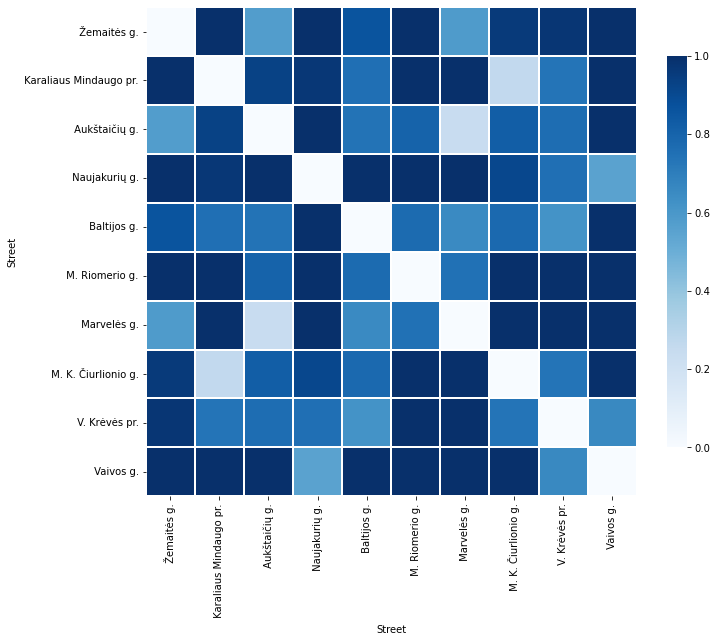

In [8]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(manhattan_df.iloc[:10,:10], cmap="Blues", vmin= 0, vmax=1,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

# Euclidean distance

In [9]:
euclidean_dist = DistanceMetric.get_metric('euclidean')
euclidean_df = pd.DataFrame(euclidean_dist.pairwise(data2),  columns=newdata.Street, index=newdata.Street)
euclidean_df.iloc[:10, :10]

Street,Žemaitės g.,Karaliaus Mindaugo pr.,Aukštaičių g.,Naujakurių g.,Baltijos g.,M. Riomerio g.,Marvelės g.,M. K. Čiurlionio g.,V. Krėvės pr.,Vaivos g.
Street,,,,,,,,,,
Žemaitės g.,0.000000,0.680646,0.343428,0.815059,0.432787,0.493746,0.288291,0.621325,0.508703,0.660656
Karaliaus Mindaugo pr.,0.680646,0.000000,0.551105,0.550316,0.373256,0.558149,0.592583,0.128835,0.375053,0.604694
Aukštaičių g.,0.343428,0.551105,0.000000,0.780001,0.401258,0.375783,0.130209,0.517412,0.371326,0.630065
Naujakurių g.,0.815059,0.550316,0.780001,0.000000,0.595579,0.782663,0.834523,0.536724,0.418641,0.307874
Baltijos g.,0.432787,0.373256,0.401258,0.595579,0.000000,0.365625,0.381797,0.344466,0.357888,0.536344
M. Riomerio g.,0.493746,0.558149,0.375783,0.782663,0.365625,0.000000,0.359441,0.546660,0.480392,0.603303
Marvelės g.,0.288291,0.592583,0.130209,0.834523,0.381797,0.359441,0.000000,0.554389,0.449172,0.682640
M. K. Čiurlionio g.,0.621325,0.128835,0.517412,0.536724,0.344466,0.546660,0.554389,0.000000,0.347151,0.592331
V. Krėvės pr.,0.508703,0.375053,0.371326,0.418641,0.357888,0.480392,0.449172,0.347151,0.000000,0.338353


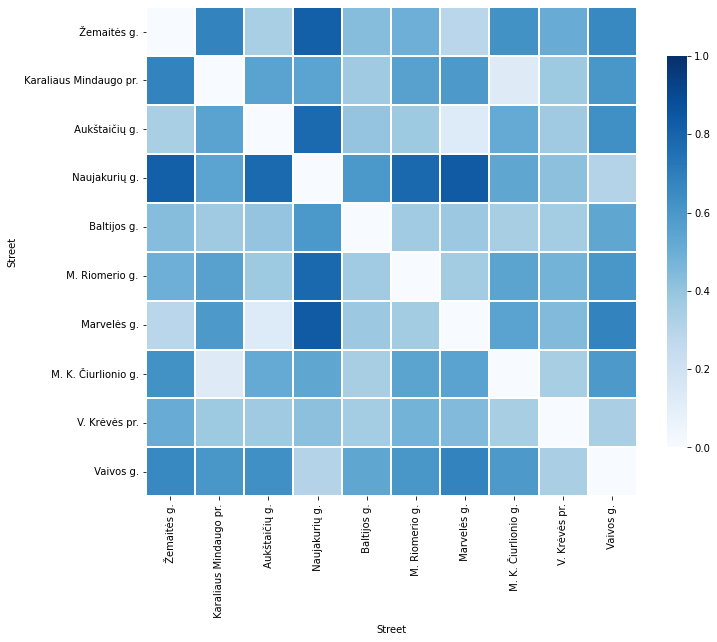

In [10]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(euclidean_df.iloc[:10,:10], cmap="Blues", vmin= 0, vmax=1,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

# Cosine similarity

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = pd.DataFrame(cosine_similarity(data2),  columns=newdata.Street, index=newdata.Street)
cosine.iloc[:10,:10]

Street,Žemaitės g.,Karaliaus Mindaugo pr.,Aukštaičių g.,Naujakurių g.,Baltijos g.,M. Riomerio g.,Marvelės g.,M. K. Čiurlionio g.,V. Krėvės pr.,Vaivos g.
Street,,,,,,,,,,
Žemaitės g.,1.000000,0.792752,0.896608,0.800336,0.896474,0.776051,0.931182,0.834332,0.828724,0.771054
Karaliaus Mindaugo pr.,0.792752,1.000000,0.945681,0.904960,0.944112,0.901857,0.904758,0.993141,0.948382,0.841743
Aukštaičių g.,0.896608,0.945681,1.000000,0.893859,0.956772,0.845847,0.978763,0.966179,0.950261,0.824525
Naujakurių g.,0.800336,0.904960,0.893859,1.000000,0.900073,0.848946,0.832355,0.910581,0.985666,0.987746
Baltijos g.,0.896474,0.944112,0.956772,0.900073,1.000000,0.947615,0.963761,0.952515,0.927345,0.857891
M. Riomerio g.,0.776051,0.901857,0.845847,0.848946,0.947615,1.000000,0.860252,0.905331,0.852601,0.826389
Marvelės g.,0.931182,0.904758,0.978763,0.832355,0.963761,0.860252,1.000000,0.930320,0.890091,0.768006
M. K. Čiurlionio g.,0.834332,0.993141,0.966179,0.910581,0.952515,0.905331,0.930320,1.000000,0.956637,0.846695
V. Krėvės pr.,0.828724,0.948382,0.950261,0.985666,0.927345,0.852601,0.890091,0.956637,1.000000,0.947798


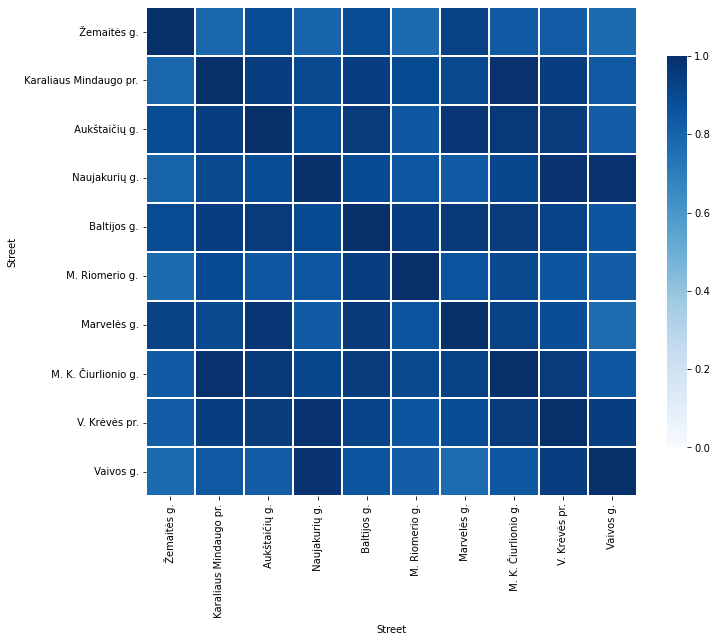

In [12]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(cosine.iloc[:10,:10], cmap="Blues", vmin= 0, vmax=1,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

# Minkowski distance

In [13]:
minkowski_dist = DistanceMetric.get_metric('minkowski')
minkowski_df = pd.DataFrame(minkowski_dist.pairwise(data2),  columns=newdata.Street, index=newdata.Street)
minkowski_df.iloc[:10,:10]

Street,Žemaitės g.,Karaliaus Mindaugo pr.,Aukštaičių g.,Naujakurių g.,Baltijos g.,M. Riomerio g.,Marvelės g.,M. K. Čiurlionio g.,V. Krėvės pr.,Vaivos g.
Street,,,,,,,,,,
Žemaitės g.,0.000000,0.680646,0.343428,0.815059,0.432787,0.493746,0.288291,0.621325,0.508703,0.660656
Karaliaus Mindaugo pr.,0.680646,0.000000,0.551105,0.550316,0.373256,0.558149,0.592583,0.128835,0.375053,0.604694
Aukštaičių g.,0.343428,0.551105,0.000000,0.780001,0.401258,0.375783,0.130209,0.517412,0.371326,0.630065
Naujakurių g.,0.815059,0.550316,0.780001,0.000000,0.595579,0.782663,0.834523,0.536724,0.418641,0.307874
Baltijos g.,0.432787,0.373256,0.401258,0.595579,0.000000,0.365625,0.381797,0.344466,0.357888,0.536344
M. Riomerio g.,0.493746,0.558149,0.375783,0.782663,0.365625,0.000000,0.359441,0.546660,0.480392,0.603303
Marvelės g.,0.288291,0.592583,0.130209,0.834523,0.381797,0.359441,0.000000,0.554389,0.449172,0.682640
M. K. Čiurlionio g.,0.621325,0.128835,0.517412,0.536724,0.344466,0.546660,0.554389,0.000000,0.347151,0.592331
V. Krėvės pr.,0.508703,0.375053,0.371326,0.418641,0.357888,0.480392,0.449172,0.347151,0.000000,0.338353


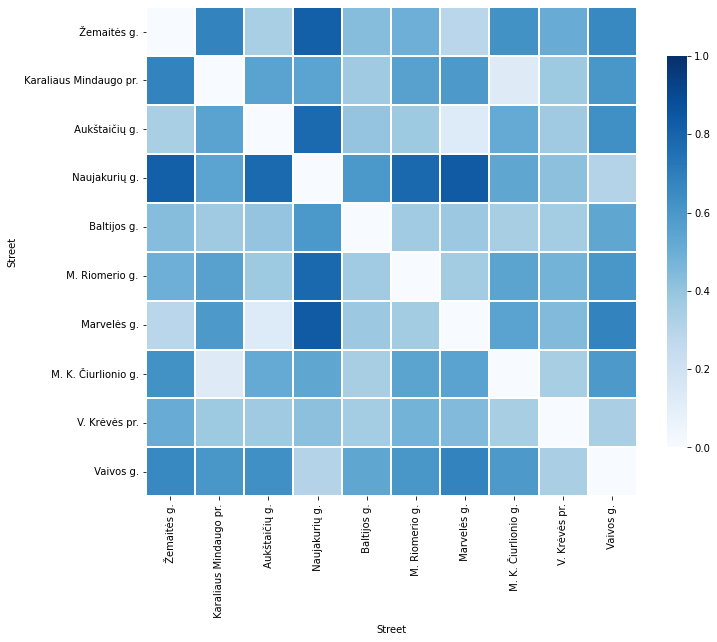

In [14]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(minkowski_df.iloc[:10,:10], cmap="Blues", vmin= 0, vmax=1,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

# Chebyshev distance

In [15]:
chebyshev_dist = DistanceMetric.get_metric('chebyshev')
chebyshev_df = pd.DataFrame(chebyshev_dist.pairwise(data2),  columns=newdata.Street, index=newdata.Street)
chebyshev_df.iloc[:10,:10]

Street,Žemaitės g.,Karaliaus Mindaugo pr.,Aukštaičių g.,Naujakurių g.,Baltijos g.,M. Riomerio g.,Marvelės g.,M. K. Čiurlionio g.,V. Krėvės pr.,Vaivos g.
Street,,,,,,,,,,
Žemaitės g.,0.000000,0.508571,0.319502,0.508571,0.342857,0.285714,0.224066,0.508571,0.394191,0.400000
Karaliaus Mindaugo pr.,0.508571,0.000000,0.474286,0.400000,0.240664,0.337143,0.480000,0.074689,0.251429,0.333333
Aukštaičių g.,0.319502,0.474286,0.000000,0.474286,0.308571,0.285714,0.095436,0.474286,0.222857,0.466667
Naujakurių g.,0.508571,0.400000,0.474286,0.000000,0.466667,0.533333,0.480000,0.400000,0.266667,0.257143
Baltijos g.,0.342857,0.240664,0.308571,0.466667,0.000000,0.285714,0.314286,0.166927,0.266667,0.400000
M. Riomerio g.,0.285714,0.337143,0.285714,0.533333,0.285714,0.000000,0.285714,0.337143,0.333333,0.466667
Marvelės g.,0.224066,0.480000,0.095436,0.480000,0.314286,0.285714,0.000000,0.480000,0.266667,0.466667
M. K. Čiurlionio g.,0.508571,0.074689,0.474286,0.400000,0.166927,0.337143,0.480000,0.000000,0.251429,0.400000
V. Krėvės pr.,0.394191,0.251429,0.222857,0.266667,0.266667,0.333333,0.266667,0.251429,0.000000,0.266667


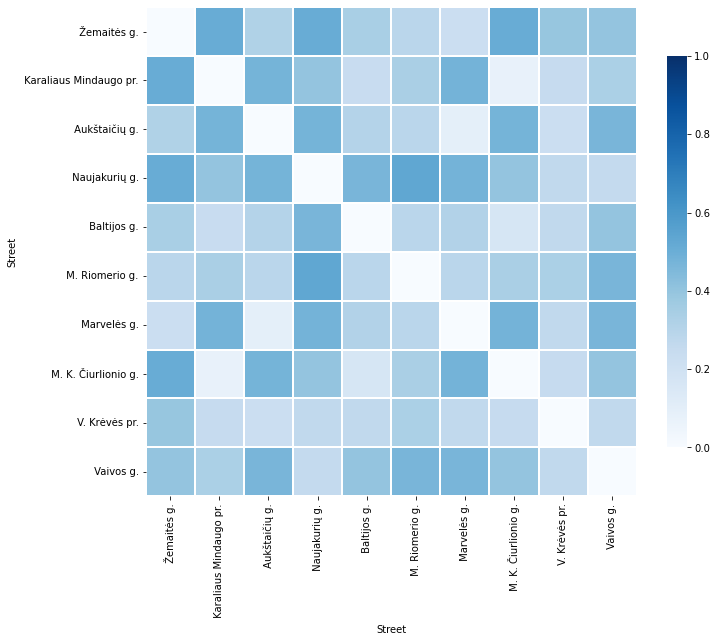

In [16]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(chebyshev_df.iloc[:10,:10], cmap="Blues", vmin= 0, vmax=1,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()